In [2]:
import requests
from bs4 import BeautifulSoup

import re

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

#Word clouds provide a quick and visually appealing way to represent and summarize text data.
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [14]:
headers = {
            "user-agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/98.0.4758.102 Safari/537.36"
        }
html_text = requests.get("https://3813653.findlaw5.flsitebuilder.com/", headers=headers).text
soup = BeautifulSoup(html_text, 'html.parser')

scrap_1 = soup.find().text

replacements = [('|',''), ('•',''), ('©',''), ('$','') ,('',''),('',''),('','')]

for key, replacement in replacements:
    if key in scrap_1:
        scrap_1 = scrap_1.replace(key,replacement)
        scrap_1 = re.sub('\s+', ' ', scrap_1).strip()

def remove_stopwords(text):
    stop_words = set(stopwords.words('english'))
    words = nltk.word_tokenize(text)
    
    filtered_content = [word for word in words if word.lower() not in stop_words]
    return ' '.join(filtered_content)
    
cleaned_content = remove_stopwords(scrap_1)

print("\033[1m\033[4mOriginal Content:\033[0m\n")
print(scrap_1)
print('')
print("\033[1m\033[4mCleaned Content:\033[0m\n")
print(cleaned_content)


Original Content:

Pittsburgh Medical Malpractice Lawyers Personal Injury Home About Caputo, John A. Jenkins, Elizabeth L. Practice Areas Medical Malpractice Anesthesia Errors Brain Cysts Emergency Room Errors Misdiagnosis/Delayed Diagnosis Cancer Heart Disease Infections Pap Specimens Strokes Surgical Errors Do I Have A Valid Medical Malpractice Claim? Truck Accidents What To Do After A Truck Accident Establishing Liability In Truck Accident Cases Personal Injury Personal Injury Settlement Tips Premises Liability Sexual Abuse Steps After An Accident Types of Personal Injury Cases Nursing Home Negligence Birth Injuries Birth Injuries FAQ Brachial Plexus Injuries Cerebral Palsy Developmental Delays Emergency C-Sections Erb’s Palsy Neonatal Resuscitation Errors Wrongful Death Results Notable Cases Blog Contact 412-620-6361 We Are Here To Guide You Through The Legal Process Call Us Today To Schedule Your Free Initial Consultation: 412-620-6361 Home About Caputo, John A. Jenkins, Elizabeth

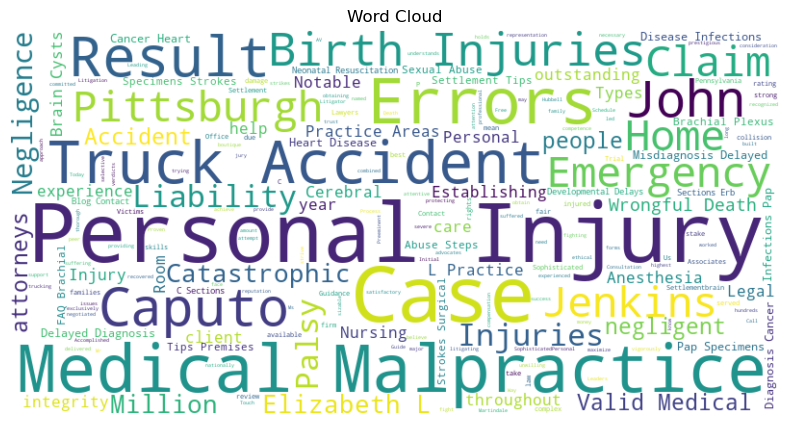

In [23]:
wordcloud = WordCloud(width=800, height=400, background_color = 'white').generate(cleaned_content)

#Dimensions of the width and height in inches.
plt.figure(figsize=(10, 5))

#bilinear interpolation results in a visually smoother representation of the word cloud.
plt.imshow(wordcloud, interpolation='bilinear')

#X & Y axis is turned off.
plt.axis("off")
plt.title("Word Cloud")
plt.show()

In [10]:
len(raw_text)

6780

In [11]:
len(cleaned_content)

5295